## Final Project Submission

Please fill out:
* Student name: Sharon Sonia Atieno
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
##Assunptions write here
##define each column 

In [2]:
#importing python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [3]:
#loading our dataset
df = pd.read_csv("bom.movie_gross.csv.gz")
df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
#familiarizing with our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [5]:
df.shape

(3387, 5)

In [6]:
df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [7]:
##Data Cleaning

In [8]:
#checking for duplicates
df.duplicated().value_counts()

False    3387
dtype: int64

In [9]:
##we do not have any duplicates

In [10]:
#checking for missing values in our dataset
df.isna().value_counts()

title  studio  domestic_gross  foreign_gross  year 
False  False   False           False          False    2007
                               True           False    1349
               True            False          False      26
       True    True            False          False       2
               False           False          False       2
                               True           False       1
dtype: int64

In [11]:
#checking for missing values in domestic gross column
df['domestic_gross'].isna().value_counts()

False    3359
True       28
Name: domestic_gross, dtype: int64

In [12]:
#checking for missing values in foreign gross column
df['foreign_gross'].isna().value_counts()

False    2037
True     1350
Name: foreign_gross, dtype: int64

In [13]:
#dropping missing values
df.dropna(how = 'any', subset =['domestic_gross'], inplace = True)

In [14]:
df.shape

(3359, 5)

In [15]:
#converting column foreign cross from object to a numeric value
df['foreign_gross'] = df['foreign_gross'].apply(pd.to_numeric, errors='coerce')
df['foreign_gross'].fillna(df['foreign_gross'].median(),inplace=True)
df['foreign_gross'].isna().value_counts()

False    3359
Name: foreign_gross, dtype: int64

In [16]:
##Checking for outliers on domestic gross and foreign gross column

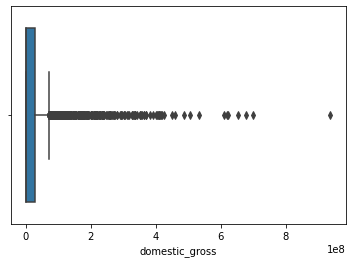

In [17]:
sns.boxplot(data=df, x="domestic_gross");

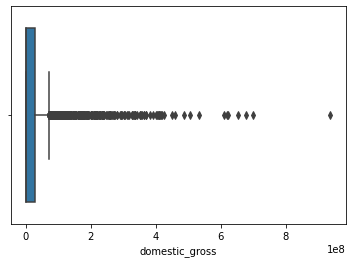

In [18]:
sns.boxplot(data=df, x="domestic_gross");

In [19]:
#clearing out outliers 

In [20]:
#using log to rescale our dataset

In [ ]:
##when ouliers seems important and are essential part of our 
##dataset it is essential to use the log function to 
##treat the outliers

In [25]:
df['Log_of_domestic_gross'] = [np.log(x) for x in df['domestic_gross']]

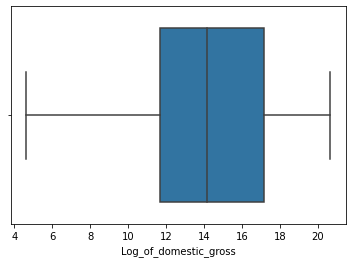

In [27]:
sns.boxplot(data=df, x=df['Log_of_domestic_gross']);

In [28]:
df['Log_of_foreign_gross'] = [np.log(x) for x in df['foreign_gross']]

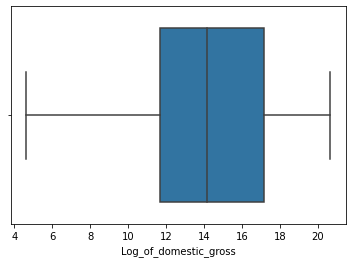

In [29]:
sns.boxplot(data=df, x=df['Log_of_domestic_gross']);

In [30]:
#setting our column title to be the index of our dataset 
df.set_index('title')

,studio,domestic_gross,foreign_gross,year,Log_of_domestic_gross,Log_of_foreign_gross
title,,,,,,
Toy Story 3,BV,415000000.0,652000000.0,2010,19.843789,20.295555
Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,19.627250,20.354084
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,19.505870,20.314244
Inception,WB,292600000.0,535700000.0,2010,19.494317,20.099085
Shrek Forever After,P/DW,238700000.0,513900000.0,2010,19.290718,20.057539
...,...,...,...,...,...,...
The Quake,Magn.,6200.0,19550000.0,2018,8.732305,16.788486
Edward II (2018 re-release),FM,4800.0,19550000.0,2018,8.476371,16.788486
El Pacto,Sony,2500.0,19550000.0,2018,7.824046,16.788486


In [39]:
#assigning variables to column domestic gross and foreign gross
x = df['Log_of_domestic_gross']
y = df['Log_of_foreign_gross']

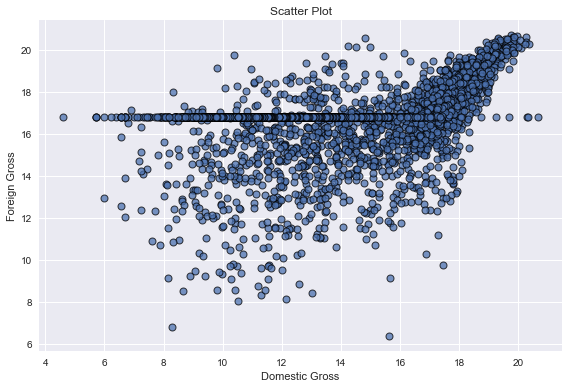

In [41]:
#testing correlation between foreign gross and domestic column
plt.style.use('seaborn')
plt.scatter(x, y , edgecolor='black', linewidth=1, alpha=0.75)

plt.title('Scatter Plot')
plt.xlabel('Domestic Gross')
plt.ylabel('Foreign Gross')
plt.tight_layout()

In [33]:
##The two variables have a positive linear relationship 
#Strong correlation to the left side of the plot than the right side
#As domestic gross goes up so does foreign gross 
#An increase in revenue in the foreign market means an adjacent increase in revenue in the domestic market 

In [34]:
##using historical data to make future predictions on revenue based on past trends 

In [35]:
#studying trends of the data set using a line graph 

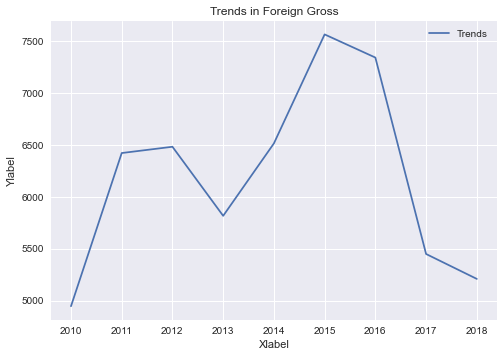

In [42]:
lineplot = sns.lineplot(data=df, x='year', y='Log_of_foreign_gross', ci=None, estimator=sum)

lineplot.set(xlabel = 'Xlabel')
lineplot.set(ylabel = 'Ylabel')
lineplot.set(title = 'Trends in Foreign Gross')
plt.legend(['Trends']);

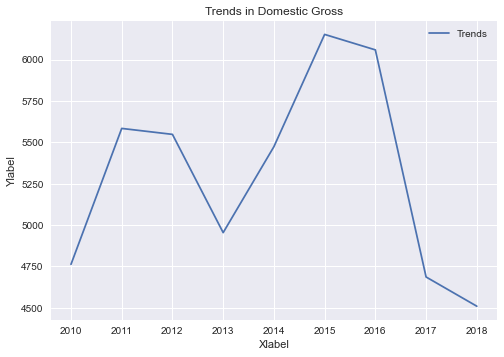

In [43]:
lineplot = sns.lineplot(data=df, x='year', y='Log_of_domestic_gross', ci=None, estimator=sum)

lineplot.set(xlabel = 'Xlabel')
lineplot.set(ylabel = 'Ylabel')
lineplot.set(title = 'Trends in Domestic Gross')
plt.legend(['Trends']);

In [44]:
#based on the trend of our domestic gross and foreign gross line graph we notice 
#that as the years go by there is a flunctuation in revenue for instance the mean value of sales for year 2013 of Domestic gross
#was very low
#total domestic gross can sometimes drop but it springs back up 
#this in turn reflects on the resiliency of the film market 
#thus we already know the market is not going to be always dormant or continously generate negative sales
#however there times we will be generating negative returns